In [1]:
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optparse
from dotenv import load_dotenv

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets
from brainflow import ml_model
from brainflow.ml_model import *


In [6]:
def save_data(label, id):
    load_dotenv()

    BoardShim.enable_dev_board_logger()

    board_id = 0
    serial_port = os.getenv("SERIAL_PORT")

    params = BrainFlowInputParams()
    params.serial_port = serial_port
    board = BoardShim(board_id, params)
    board.prepare_session()
    sampling_rate = board.get_sampling_rate(board_id)   # per second, presumably

    board.start_stream()
    t = 10
    time.sleep(t)
    # data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer
    data = board.get_board_data()  # get all data and remove it from internal buffer
    board.stop_stream()
    board.release_session()

    pd.DataFrame([[1 / sampling_rate * i for i in range(len(data[1]))], *data[1:8, :]]).to_csv(f"concentration_data\\{label}_{id}.csv")

In [58]:
save_data("N", 20)

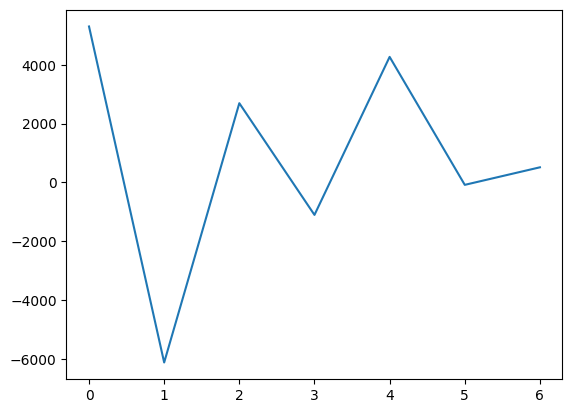

In [49]:
plt.plot(pd.read_csv("concentration_data\\Y_19.csv")["0"][1:].to_numpy())